In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
df = pd.read_csv("customer.csv")

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [80]:
df.drop(columns=["ID", "Work_Experience", "Var_1"], inplace=True)

df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,High,6.0,A


In [81]:
df.isna().sum(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          10695 non-null  object 
 1   Ever_Married    10505 non-null  object 
 2   Age             10695 non-null  int64  
 3   Graduated       10593 non-null  object 
 4   Profession      10533 non-null  object 
 5   Spending_Score  10695 non-null  object 
 6   Family_Size     10247 non-null  float64
 7   Segmentation    10695 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 668.6+ KB


(Gender              0
 Ever_Married      190
 Age                 0
 Graduated         102
 Profession        162
 Spending_Score      0
 Family_Size       448
 Segmentation        0
 dtype: int64,
 None)

In [82]:
marrid_val = df.Ever_Married.value_counts(sort=True).index[0]
graduated_val = df.Graduated.value_counts(sort=True).index[0]
profession_val = df.Profession.value_counts(sort=True).index[0]
family_val = df.Family_Size.mean().__ceil__()

df.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [83]:
df.fillna(value={'Gender':0, 'Ever_Married' : marrid_val, 'Age':0, 'Graduated': graduated_val, 
                  'Profession': profession_val, 'Spending_Score':0, 'Family_Size': family_val, 'Segmentation':0},
                  inplace=True)

df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,High,6.0,A


In [84]:
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [87]:
df.Gender = df.Gender.map({"Male": 0, "Female": 1})
df.Ever_Married = df.Ever_Married.map({"No": 0, "Yes": 1})
df.Graduated = df.Graduated.map({"No": 0, "Yes": 1})
df.Profession = df.Profession.map({'Healthcare' : 1, 'Engineer':2, 'Lawyer':3, 'Entertainment':4, 'Artist':5,
       'Executive':6, 'Doctor':7, 'Homemaker':8, 'Marketing':9})
df.Spending_Score = df.Spending_Score.map({"Low": 1, "Average": 2, "High":3})

df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,NaN,NaN,22,NaN,NaN,NaN,4.0,D
1,NaN,NaN,38,NaN,NaN,NaN,3.0,A
2,NaN,NaN,67,NaN,NaN,NaN,1.0,B
3,NaN,NaN,67,NaN,NaN,NaN,2.0,B
4,NaN,NaN,40,NaN,NaN,NaN,6.0,A


In [ ]:
x = df.drop(columns="Segmentation")
y = df.Segmentation

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# model = KNeighborsClassifier(n_neighbors=10, weights="distance" )
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           A       0.77      0.76      0.77      2535
           B       0.74      0.69      0.71      2156
           C       0.73      0.78      0.75      2215
           D       0.82      0.84      0.83      2719

    accuracy                           0.77      9625
   macro avg       0.76      0.76      0.76      9625
weighted avg       0.77      0.77      0.77      9625



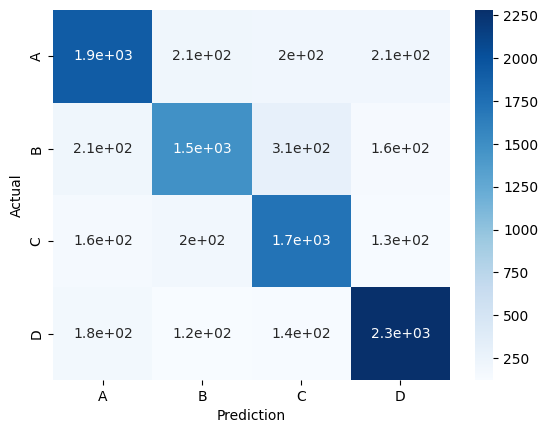

In [ ]:
y_pred = model.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred)
sns.heatmap(cm_train, annot=True, cmap="Blues", xticklabels=["A", "B", "C", "D"], yticklabels=["A", "B", "C", "D"])
plt.xlabel("Prediction")
plt.ylabel("Actual")

print(classification_report(y_train, y_pred, target_names=["A", "B", "C", "D"]))

              precision    recall  f1-score   support

           A       0.39      0.39      0.39       283
           B       0.37      0.33      0.35       252
           C       0.41      0.46      0.43       227
           D       0.54      0.53      0.54       308

    accuracy                           0.43      1070
   macro avg       0.43      0.43      0.43      1070
weighted avg       0.43      0.43      0.43      1070



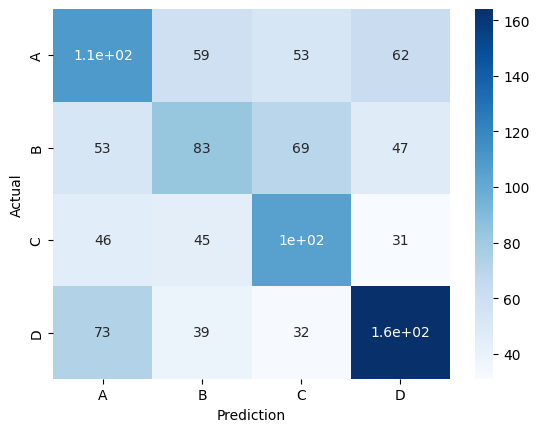

In [ ]:
y_pred = model.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, cmap="Blues", xticklabels=["A", "B", "C", "D"], yticklabels=["A", "B", "C", "D"])
plt.xlabel("Prediction")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred, target_names=["A", "B", "C", "D"]))

In [88]:
df.Segmentation = df.Segmentation.map({"A": 1, "B": 2, "C":3, "D":4})

<Axes: >

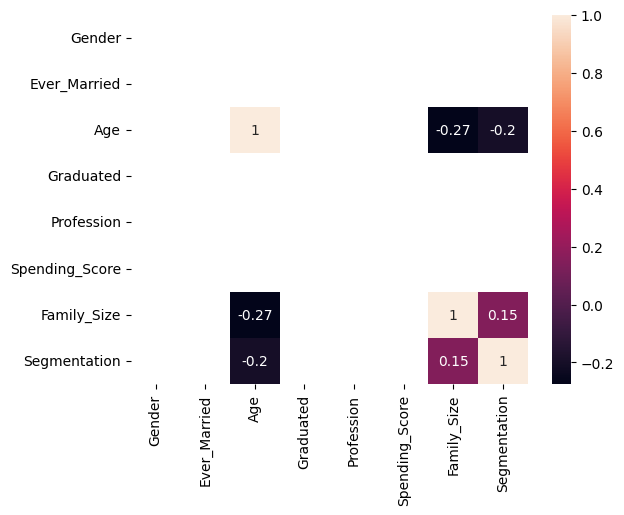

In [89]:
sns.heatmap(df.corr(), annot=True)